<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv("Social_Network_Ads (2).csv")

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.shape

(400, 5)

In [18]:
X=df.iloc[:,2:4]
y=df.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [20]:
X_train.shape

(320, 2)

In [22]:
st=StandardScaler()

In [23]:
X_train_tf=st.fit_transform(X_train)
X_test_tf=st.transform(X_test)

In [32]:
model=Sequential()

In [35]:
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
import time
start=time.time()
history=model.fit(X_train_tf,y_train,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9156 - loss: 0.2270
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9156 - loss: 0.2270
0.7706131935119629


In [54]:
import time
start=time.time()
history=model.fit(X_train_tf,y_train,epochs=10,batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9106 - loss: 0.2603
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9171 - loss: 0.2317
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8994 - loss: 0.2419
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9193 - loss: 0.2318
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9218 - loss: 0.2123
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.1914
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9245 - loss: 0.2370
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9067 - loss: 0.2354
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9346 - loss: 0.2056
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.2073
7.936754941940308


In [55]:
import time
start=time.time()
history=model.fit(X_train_tf,y_train,epochs=10,batch_size=10)
print(time.time() - start)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.1819 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9282 - loss: 0.2164
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9161 - loss: 0.2406
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.2123
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9342 - loss: 0.1867
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9298 - loss: 0.2024
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8995 - loss: 0.2549
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9255 - loss: 0.2223
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.2706
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9180 - loss: 0.2384
2.107455015182495


In [56]:
import matplotlib.pyplot as plt


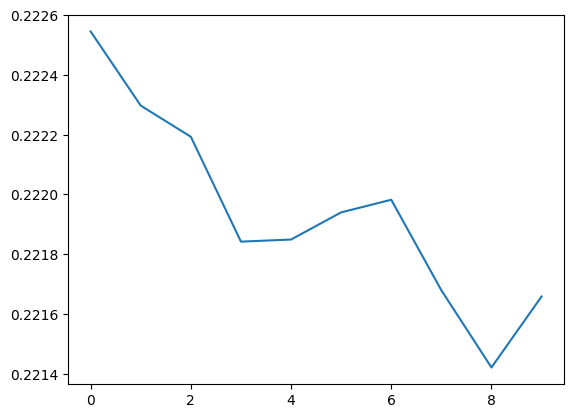

In [57]:
plt.plot(history.history['loss'])

In [58]:
import time
start=time.time()
history=model.fit(X_train_tf,y_train,epochs=10,batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9235 - loss: 0.2318
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9224 - loss: 0.2267
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9127 - loss: 0.2364
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9365 - loss: 0.1973
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8923 - loss: 0.2871
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9155 - loss: 0.2517
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9262 - loss: 0.2179
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9205 - loss: 0.2267
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2658
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9301 - loss: 0.1803
7.454703330993652


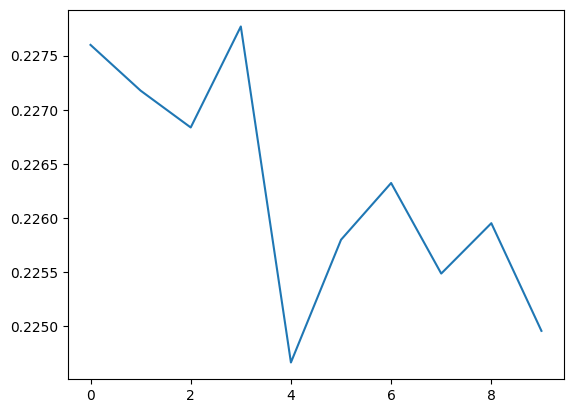

In [59]:
plt.plot(history.history['loss'])

In [60]:
import time
start=time.time()
history=model.fit(X_train_tf,y_train,epochs=10,batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9250 - loss: 0.2183
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9250 - loss: 0.2183
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9250 - loss: 0.2182
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9250 - loss: 0.2182
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9250 - loss: 0.2181
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9250 - loss: 0.2181
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9250 - loss: 0.2181
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9250 - loss: 0.2180
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9250 - loss: 0.2180
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9250 - loss: 0.2180
1.5059401988983154


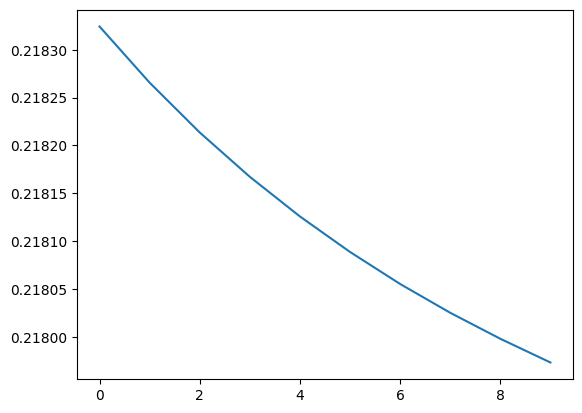

In [61]:
plt.plot(history.history['loss'])